In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [42]:
data = pd.read_csv(r"E:\Info_Srping\FWI_Prediction\Data\processed\filtered_data_NN.csv")
data

Unnamed: 0  temperature  dew_point_temperature  relative_humidity  \
0                 0         12.0                    7.6               74.4   
1                 1         11.1                    1.7               52.0   
2                 2          2.9                    2.3               95.0   
3                 3         22.1                   11.1               49.8   
4                 4         17.0                   10.0               63.6   
...             ...          ...                    ...                ...   
1085123     1183935         22.5                   15.4               63.0   
1085124     1183936         17.4                   12.1               70.0   
1085125     1183937         21.0                   15.0               68.7   
1085126     1183938         16.2                   -1.4               31.0   
1085127     1183939          6.8                   -4.3               45.4   

         wind_speed  wind_direction  atmospheric_pressure  visibility  \
0              12.0               0               1015.13        30.0   
1              22.1             200               1010.80        38.6   
2               1.9             250               1018.19        27.7   
3               9.5             267               1015.79        23.9   
4              35.2             260               1016.70        16.1   
...             ...             ...                   ...         ...   
1085123        35.2             180               1016.90        10.1   
1085124        22.2             300               1018.30        49.7   
1085125        13.0             200               1014.50        14.5   
1085126        25.9             220               1016.50        48.3   
1085127        24.1             270               1014.60        24.0   

         precipitation  rain_days  ...  duff_moisture_code  drought_code  \
0                  2.6          0  ...                 6.9          51.1   
1                  1.5          0  ...                14.8         104.2   
2                  0.0          2  ...                 3.1         330.1   
3                  0.0          4  ...                11.4         282.9   
4                  0.0          1  ...               107.4         482.9   
...                ...        ...  ...                 ...           ...   
1085123            0.0          2  ...                11.5          27.6   
1085124            0.0         10  ...                20.6         334.2   
1085125            0.0          1  ...                 5.2         107.5   
1085126            0.0          3  ...                12.1          21.5   
1085127            0.0          1  ...                 4.8         372.8   

         build_up_index  initial_spread_index  fire_weather_index  \
0                  10.3                   0.9                 0.6   
1                  21.9                   1.7                 2.7   
2                   6.1                   0.1                 0.0   
3                  20.7                   3.8                 6.3   
4                 138.1                  15.6                47.7   
...                 ...                   ...                 ...   
1085123            11.5                  16.9                16.3   
1085124            35.6                   6.1                12.8   
1085125             9.3                   2.1                 1.8   
1085126            12.0                  15.3                15.4   
1085127             9.2                   2.2                 1.9   

         daily_severity_rating         country   latitude  longitude  \
0                          0.0  United Kingdom  54.502224   -2.68500   
1                          0.2          Canada  55.200000 -119.40000   
2                          0.0          Canada  49.820000  -74.98000   
3                          0.7          Canada  54.280000 -111.45000   
4                         25.4   United States  37.618805 -122.37542   
...                  

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085128 entries, 0 to 1085127
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1085128 non-null  int64  
 1   temperature              1085128 non-null  float64
 2   dew_point_temperature    1085128 non-null  float64
 3   relative_humidity        1085128 non-null  float64
 4   wind_speed               1085128 non-null  float64
 5   wind_direction           1085128 non-null  int64  
 6   atmospheric_pressure     1085128 non-null  float64
 7   visibility               1085128 non-null  float64
 8   precipitation            1085128 non-null  float64
 9   rain_days                1085128 non-null  int64  
 10  snow_on_ground           1085128 non-null  float64
 11  fine_fuel_moisture_code  1085128 non-null  float64
 12  duff_moisture_code       1085128 non-null  float64
 13  drought_code             1085128 non-null 

In [44]:
data = data.drop(['visibility', 'longitude','latitude', 'elevation', 'Unnamed: 0','daily_severity_rating','snow_on_ground','wind_direction'], axis =1)
data

temperature  dew_point_temperature  relative_humidity  wind_speed  \
0               12.0                    7.6               74.4        12.0   
1               11.1                    1.7               52.0        22.1   
2                2.9                    2.3               95.0         1.9   
3               22.1                   11.1               49.8         9.5   
4               17.0                   10.0               63.6        35.2   
...              ...                    ...                ...         ...   
1085123         22.5                   15.4               63.0        35.2   
1085124         17.4                   12.1               70.0        22.2   
1085125         21.0                   15.0               68.7        13.0   
1085126         16.2                   -1.4               31.0        25.9   
1085127          6.8                   -4.3               45.4        24.1   

         atmospheric_pressure  precipitation  rain_days  \
0                     1015.13            2.6          0   
1                     1010.80            1.5          0   
2                     1018.19            0.0          2   
3                     1015.79            0.0          4   
4                     1016.70            0.0          1   
...                       ...            ...        ...   
1085123               1016.90            0.0          2   
1085124               1018.30            0.0         10   
1085125               1014.50            0.0          1   
1085126               1016.50            0.0          3   
1085127               1014.60            0.0          1   

         fine_fuel_moisture_code  duff_moisture_code  drought_code  \
0                           64.1                 6.9          51.1   
1                           66.2                14.8         104.2   
2                           44.3                 3.1         330.1   
3                           85.8                11.4         282.9   
4                           86.6               107.4         482.9   
...                          ...                 ...           ...   
1085123                     87.2                11.5          27.6   
1085124                     84.5                20.6         334.2   
1085125                     79.8                 5.2         107.5   
1085126                     89.8                12.1          21.5   
1085127                     71.2                 4.8         372.8   

         build_up_index  initial_spread_index  fire_weather_index  \
0                  10.3                   0.9                 0.6   
1                  21.9                   1.7                 2.7   
2                   6.1                   0.1                 0.0   
3                  20.7                   3.8                 6.3   
4                 138.1                  15.6                47.7   
...                 ...                   ...                 ...   
1085123            11.5                  16.9                16.3   
1085124            35.6                   6.1                12.8   
1085125             9.3                   2.1                 1.8   
1085126            12.0                  15.3                15.4   
1085127             9.2                   2.2                 1.9   

                country  
0        United Kingdom  
1                Canada  
2                Canada  
3                Canada  
4         United States  
...                 ...  
1085123          Canada  
1085124          Canada  
1085125          Canada  
1085126          Canada  
1085127          Canada  

[1085128 rows x 14 columns]

In [45]:
data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'atmospheric_pressure', 'precipitation', 'rain_days',
       'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
       'build_up_index', 'initial_spread_index', 'fire_weather_index',
       'country'],
      dtype='object')

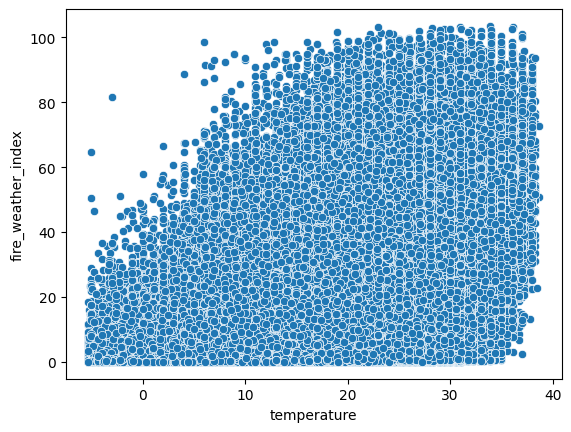

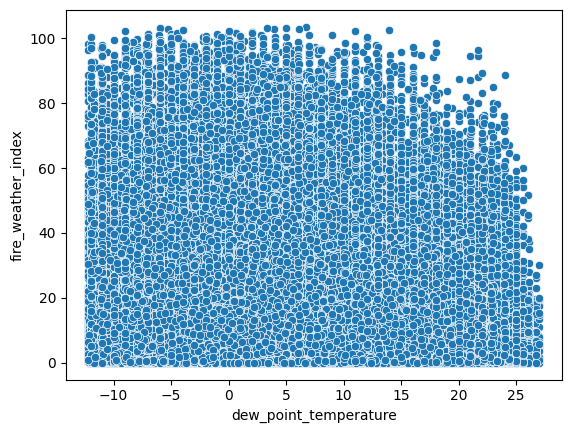

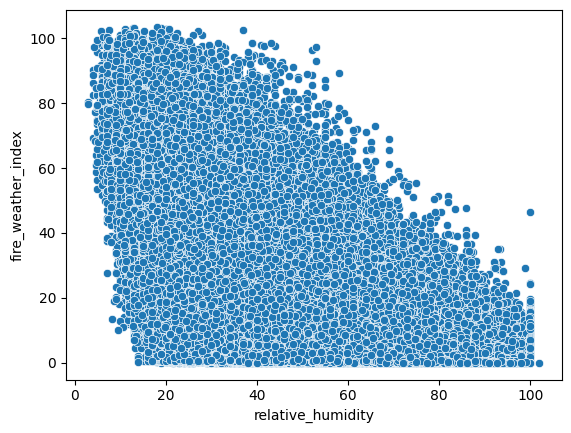

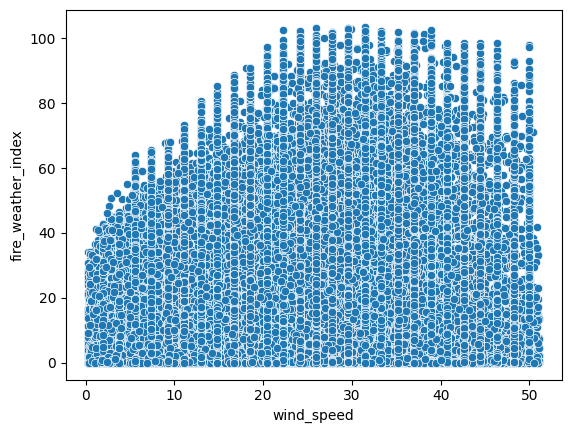

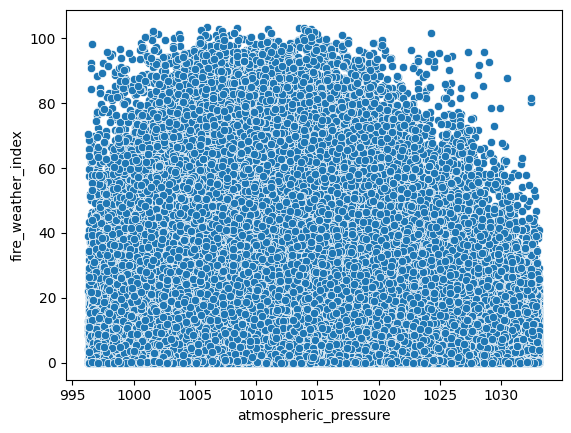

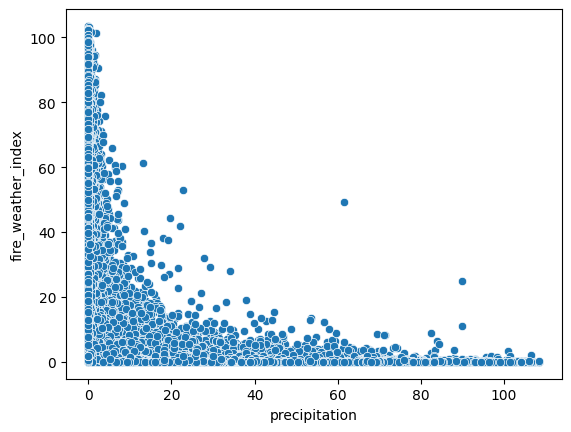

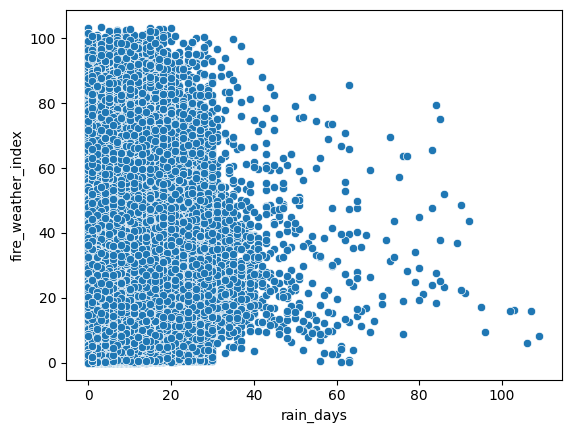

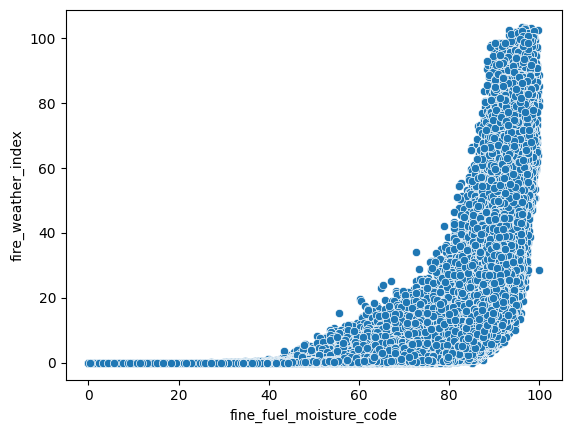

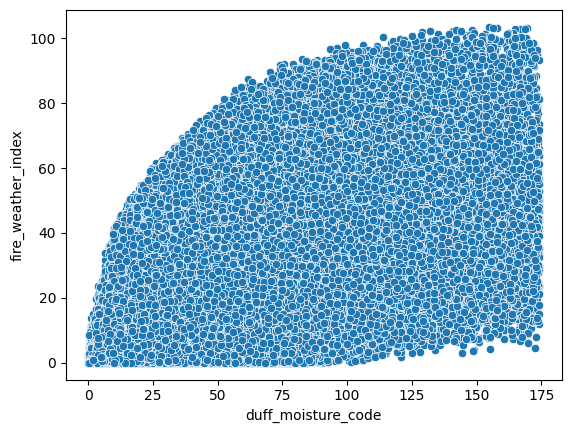

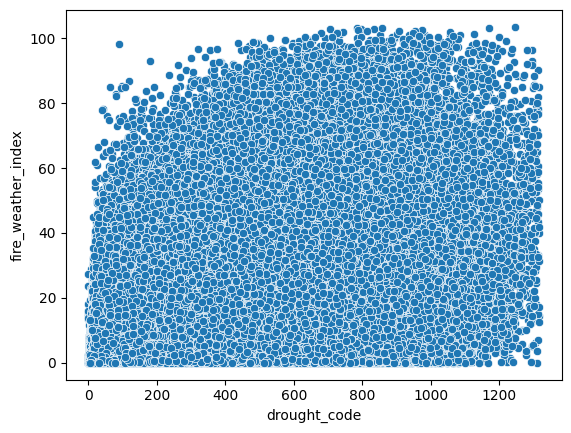

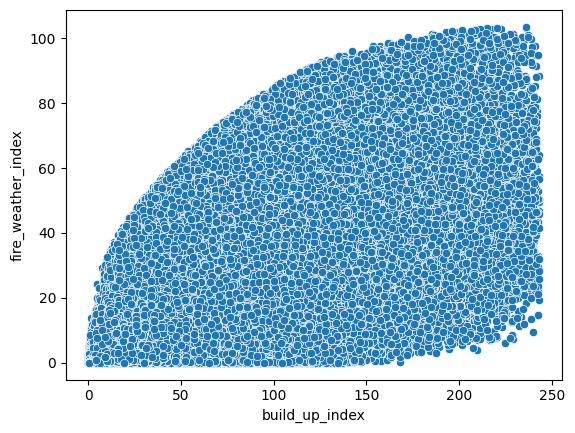

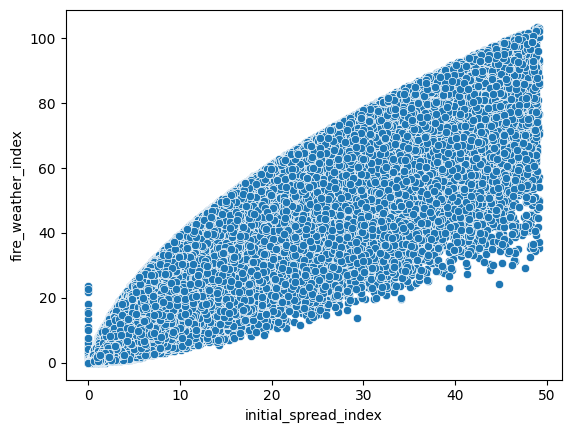

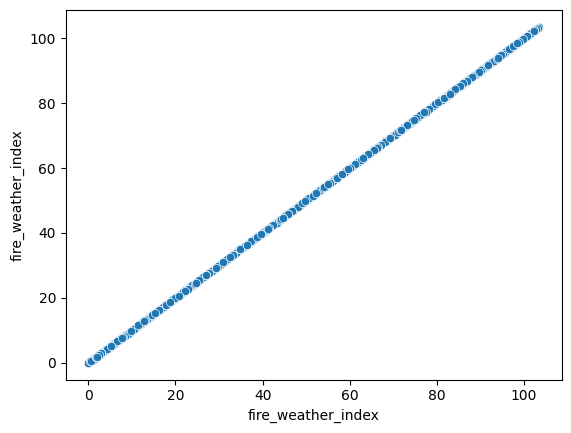

In [46]:
for col in data.columns:
    if data[col].dtype != 'object':
        sns.scatterplot(data = data, x=data[col], y = 'fire_weather_index')
        plt.show()

In [47]:
from sklearn.model_selection import train_test_split
data_sanple, _ = train_test_split(data, test_size=0.9, stratify=data['country'], random_state=42)

In [48]:
data_sanple

temperature  dew_point_temperature  relative_humidity  wind_speed  \
890212         27.0                    7.0               28.0         9.3   
690678          9.0                    3.3               67.7         3.7   
693294         25.2                   19.8               72.1         9.3   
376922         27.2                   16.1               50.7        16.7   
213911          8.3                    0.8               59.5        13.0   
...             ...                    ...                ...         ...   
316425         20.9                    5.2               36.0        16.7   
242549         23.2                   10.5               45.0         7.2   
645386         18.5                    5.1               41.5         3.7   
322186         14.0                    6.0               58.8        27.8   
9338           10.2                    8.7               90.5        31.5   

        atmospheric_pressure  precipitation  rain_days  \
890212                1010.3            0.0          6   
690678                1022.3            0.0          1   
693294                1012.6            2.6          0   
376922                1016.0            0.0          1   
213911                1020.6           15.4          0   
...                      ...            ...        ...   
316425                1013.4            0.0          2   
242549                1013.9            0.1          0   
645386                1024.5            0.0          6   
322186                1013.2            0.0          4   
9338                  1015.7            0.0          2   

        fine_fuel_moisture_code  duff_moisture_code  drought_code  \
890212                     92.7               103.0         459.5   
690678                     78.9                 7.9         158.8   
693294                     59.2                 6.9         201.5   
376922                     86.1                13.4          52.0   
213911                     36.0                 0.5           2.2   
...                         ...                 ...           ...   
316425                     89.5                15.2         162.2   
242549                     82.8                15.7         258.5   
645386                     88.2                33.6         113.4   
322186                     83.5                84.6         671.2   
9338                       62.4                 0.5          21.8   

        build_up_index  initial_spread_index  fire_weather_index  \
890212           132.0                  10.0                35.4   
690678            14.0                   1.2                 0.9   
693294            12.7                   0.6                 0.4   
376922            16.3                   5.7                 8.0   
213911             0.7                   0.0                 0.0   
...                ...                   ...                 ...   
316425            24.7                   9.3                14.7   
242549            27.3                   2.3                 4.5   
645386            38.6                   4.0                 9.5   
322186           128.6                   7.0                27.5   
9338               1.0                   2.3                 0.6   

              country  
890212  United States  
690678         Canada  
693294         Canada  
376922  United States  
213911         Canada  
...               ...  
316425         Canada  
242549         Canada  
645386         Canada  
322186         Canada  
9338           Canada  

[108512 rows x 14 columns]

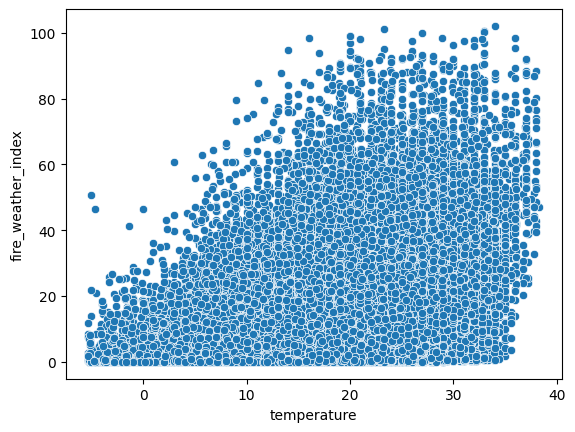

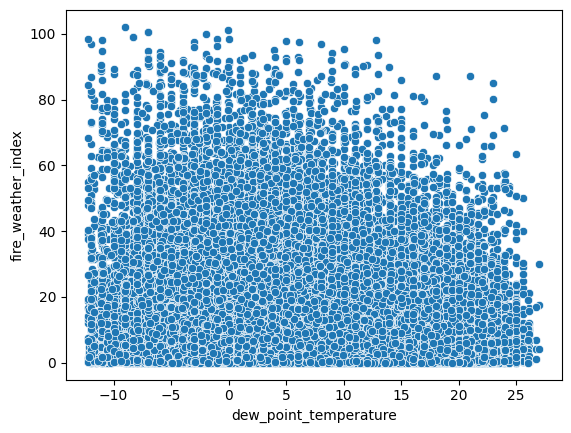

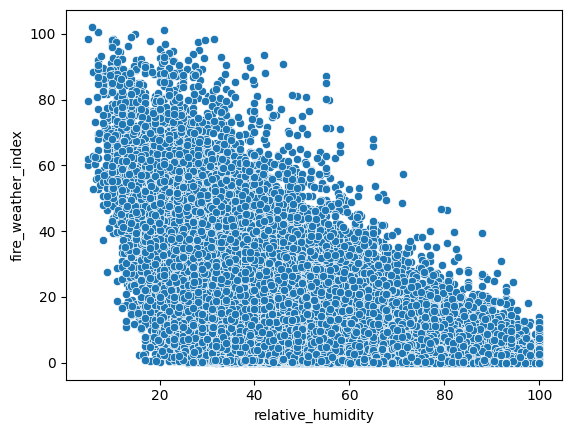

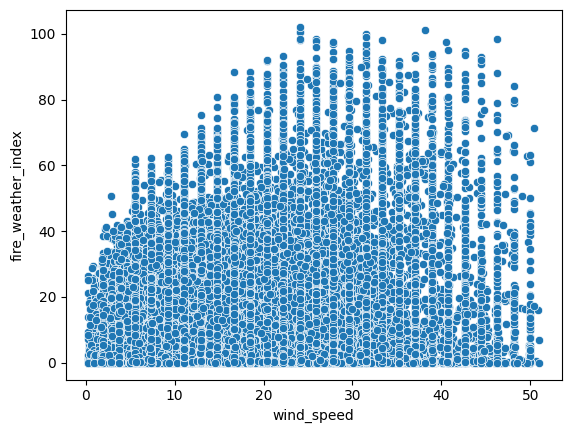

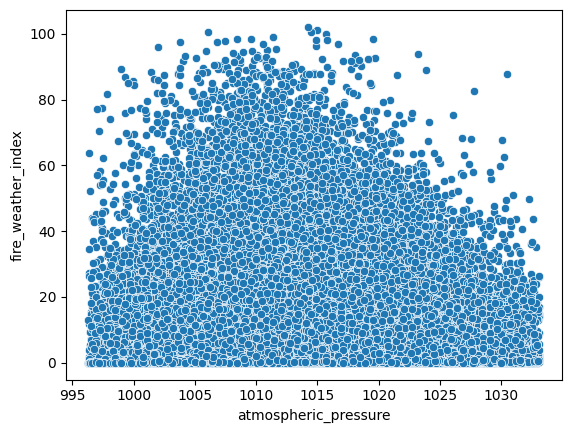

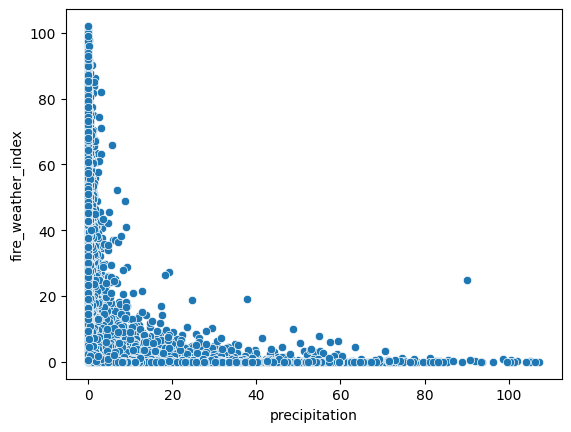

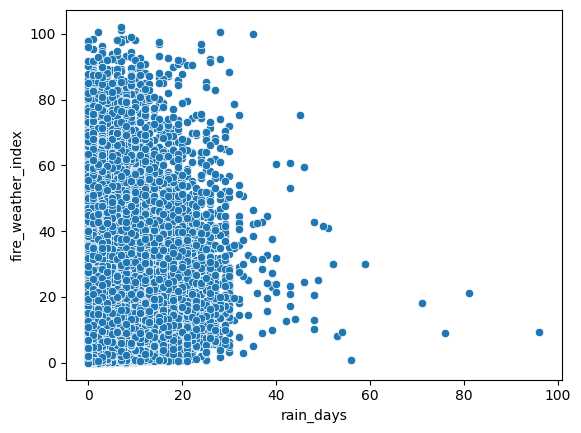

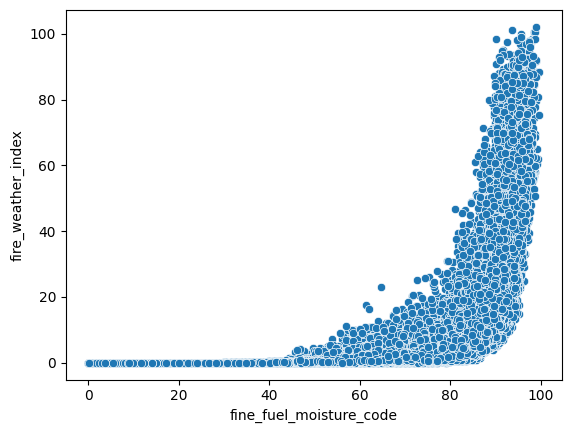

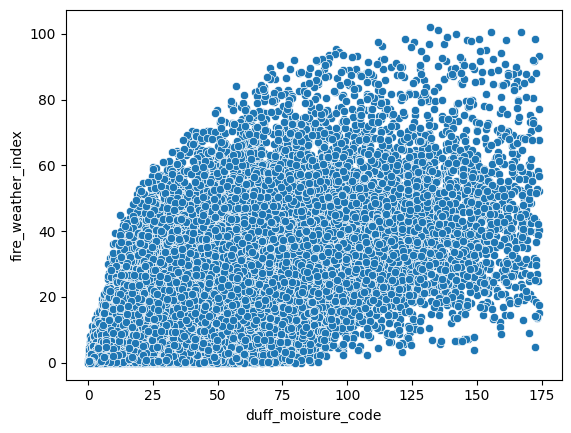

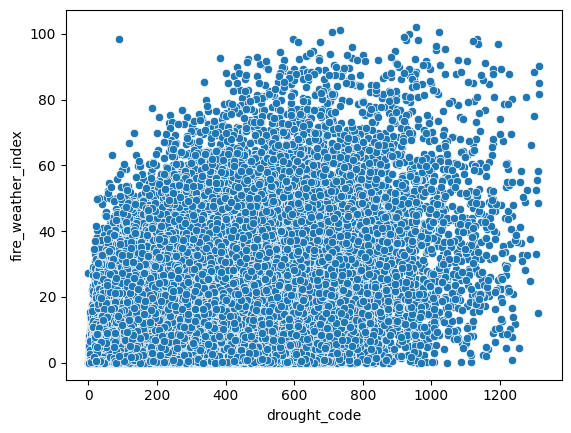

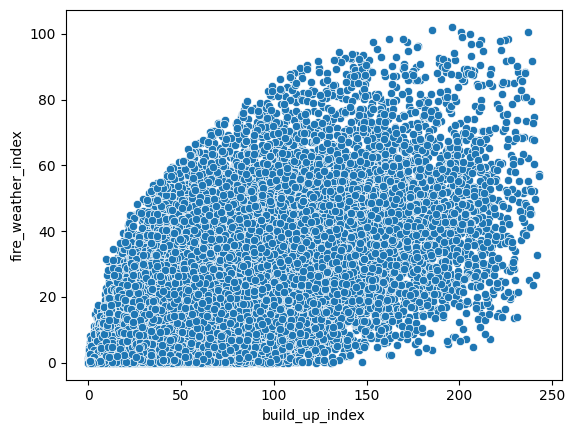

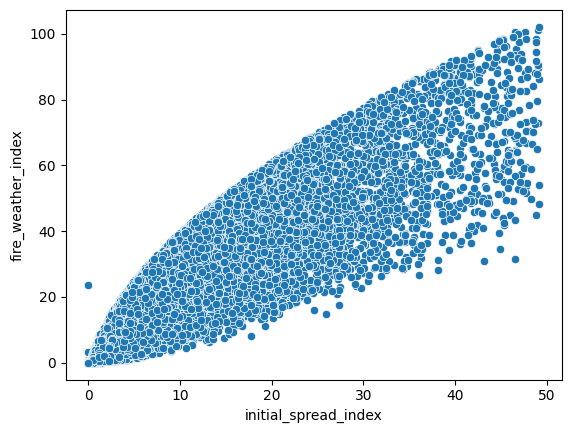

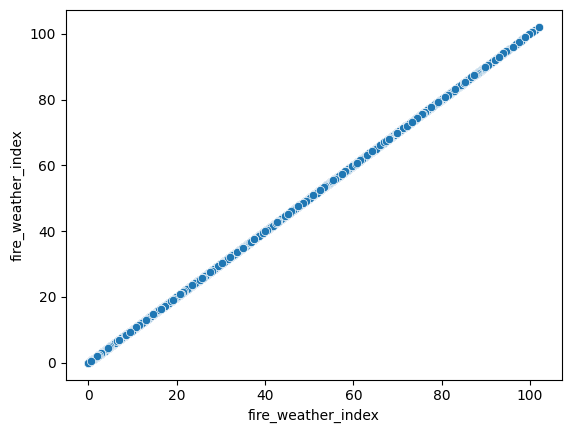

In [49]:
for col in data_sanple.columns:
    if data_sanple[col].dtype != 'object':
        sns.scatterplot(data = data_sanple, x=data_sanple[col], y = 'fire_weather_index')
        plt.show()

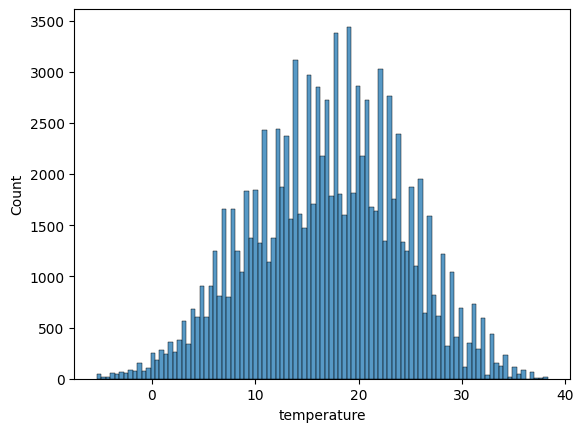

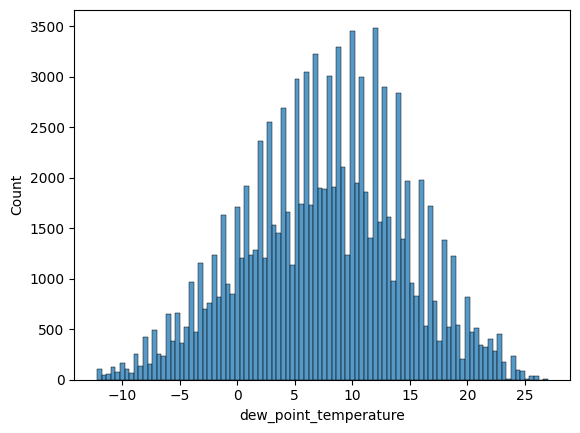

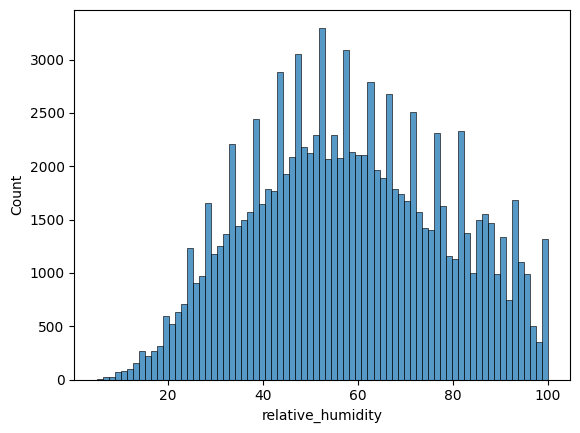

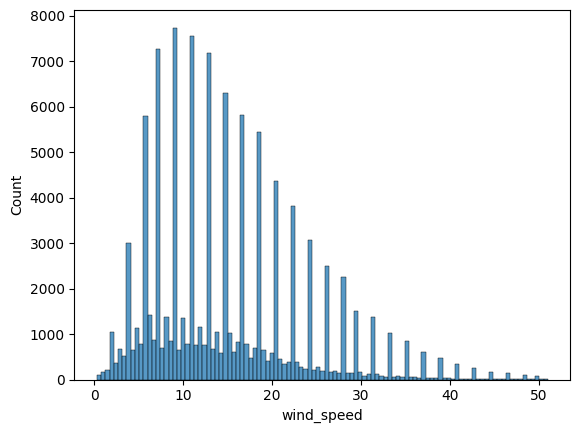

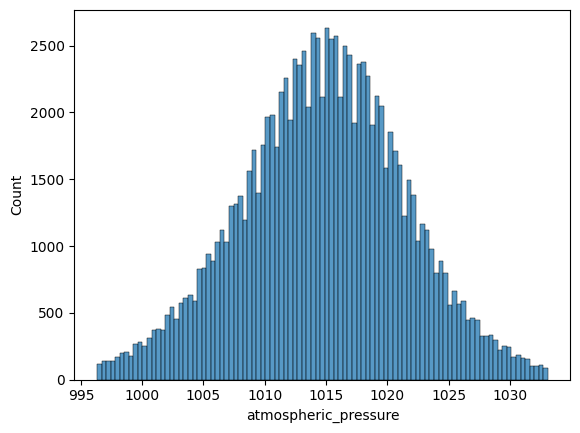

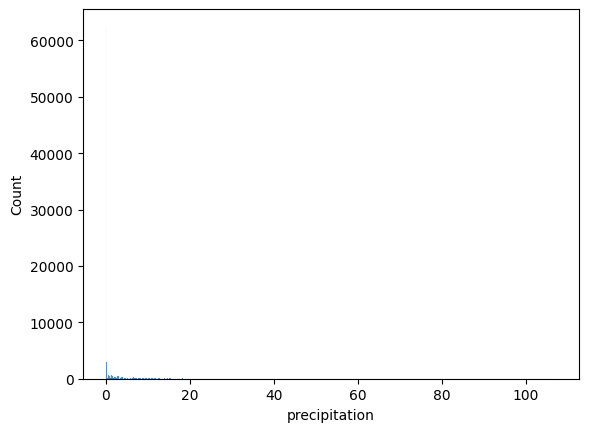

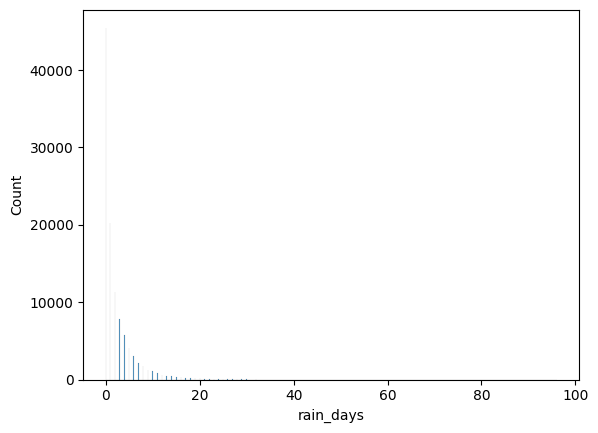

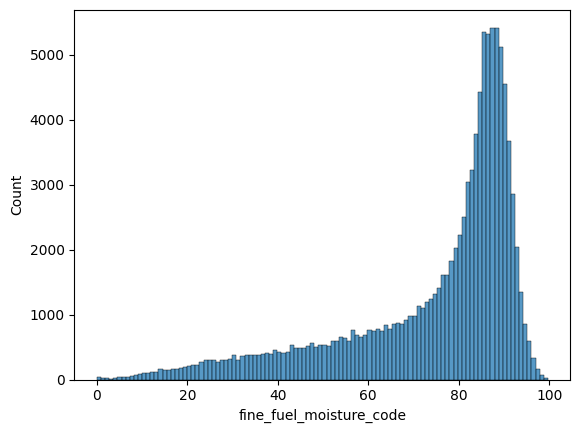

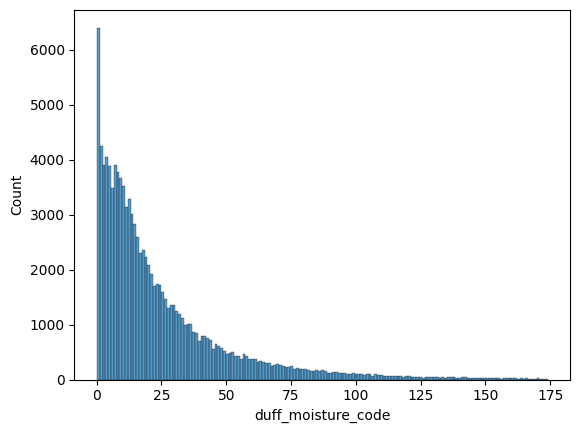

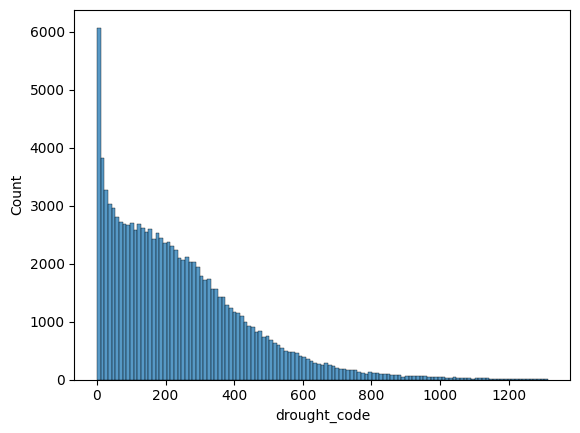

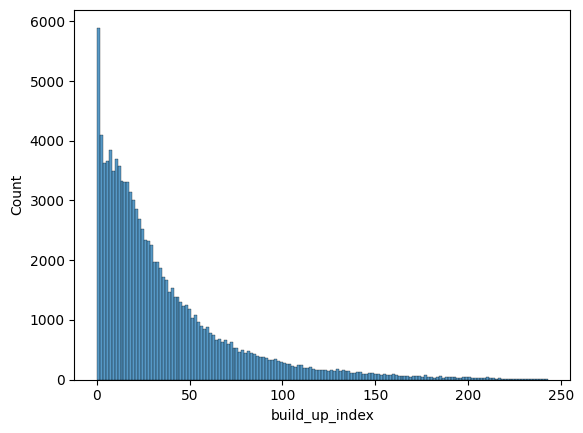

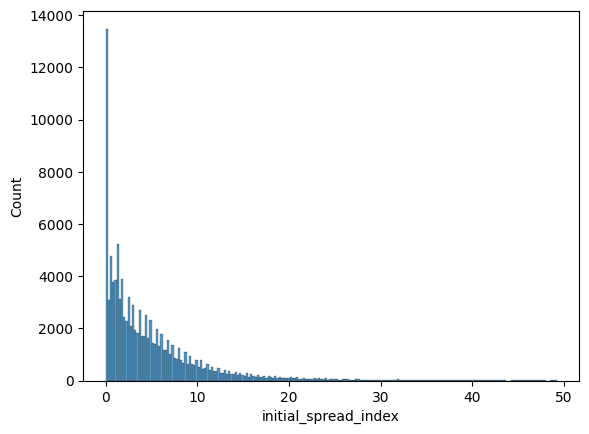

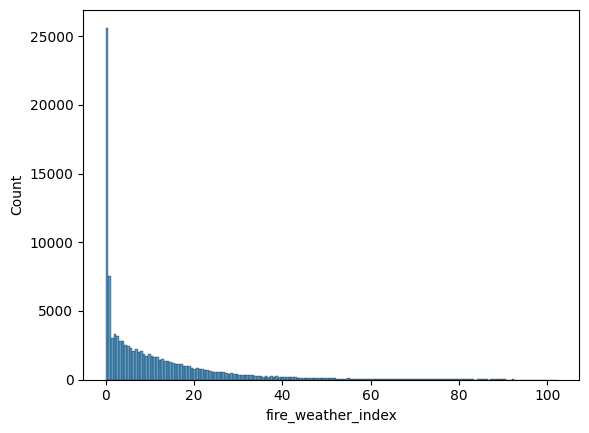

In [50]:
for col in data_sanple.columns:
    if data_sanple[col].dtype != 'object':
        sns.histplot(data = data_sanple, x=data_sanple[col])
        plt.show()

In [ ]:
# 1. Identify columns with many zeros (threshold example >50%)
zero_threshold = 0.5
zero_cols = [col for col in data.columns if (data[col] == 0).mean() > zero_threshold]

# 2. Identify non-normal distributed columns (simple heuristic: skip normally distributed)
# Here, just assume you have a list or you can decide this with tests - placeholder:
non_normal_cols = [col for col in data.columns if col not in zero_cols and col != 'country']

# (Optional) Conduct actual normality test for better precision:
# from scipy.stats import shapiro
# non_normal_cols = []
# for col in data.columns:
#     if col != 'country' and (data[col] != 0).all():  # skip zero columns temporarily
#         stat, p = shapiro(data[col])
#         if p < 0.05:  # reject normality
#             non_normal_cols.append(col)

# 3. Create zero-indicator columns for zero-heavy columns
for col in zero_cols:
    data[col + '_zero_ind'] = (data[col] == 0).astype(int)

# 4. Apply power transformation on non-normal columns (only on non-zero values if any zeros)
pt = PowerTransformer(method='yeo-johnson')  # handles zero/negative values

for col in non_normal_cols:
    # If column has zeros, apply transform only on non-zero and keep zeros as is
    if col in zero_cols:
        non_zero_mask = data[col] != 0
        transformed = np.zeros(data.shape[0])
        transformed[non_zero_mask] = pt.fit_transform(data.loc[non_zero_mask, [col]]).flatten()
        data[col + '_transformed'] = transformed
    else:
        data[col + '_transformed'] = pt.fit_transform(data[[col]])

# 5. Scale all numeric features (excluding categorical 'country' and zero indicators if preferred)
features_to_scale = [c for c in data.columns if c not in ['country'] and data[c].dtype in [np.float64, np.int64]]

scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Now data is ready for linear regression with transformed and scaled features,
# and zero indicators for zero-heavy columns.


In [27]:
print(dir(scipy.stats))

['BootstrapMethod', 'CensoredData', 'ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'MonteCarloMethod', 'NearConstantInputWarning', 'PermutationMethod', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_censored_data', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multicomp', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_qmvnt', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sensitivity_analysis', '_sobol', '_statlib', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_survival', '_tukeylambda_stats', '_variation